# File and libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath = r'dataset/df_ecom_data_prep_encoded.csv'


file_tag = "df_ecom_encoded"

# DSLabs functions

In [3]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

%run "data_functions.py" #run notebook with additional functions made by the group and needed for the project


data_functions lodaded
data_functions lodaded


# Load

In [11]:
# test_data=True
test_data=False

if test_data==True:

    df=pd.read_csv(filepath)

    # 10% sample
    df=df.sample(frac=0.1, replace=False)
    

else:
    df=pd.read_csv(filepath)

 
target='conversion'

# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
df.sort_values(by='day', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104946 entries, 17596 to 14153
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   event_type           104946 non-null  int64  
 1   category_code_lvl_1  94367 non-null   float64
 2   category_code_lvl_2  94367 non-null   float64
 3   category_code_lvl_3  92112 non-null   float64
 4   price                104946 non-null  float64
 5   conversion           104946 non-null  int64  
 6   week_of_month        104946 non-null  int64  
 7   is_weekend           104946 non-null  int64  
 8   day                  104946 non-null  int64  
 9   time_of_day_sin      104946 non-null  float64
 10  time_of_day_cos      104946 non-null  float64
 11  day_of_week_sin      104946 non-null  float64
 12  day_of_week_cos      104946 non-null  float64
 13  hour_sin             104946 non-null  float64
 14  hour_cos             104946 non-null  float64
 15  min_sin            

In [6]:
df.head()

,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,week_of_month,is_weekend,day,is_view,is_cart,is_purchase,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
86742,6.0,42.0,102.0,128.45,0,0,0,1,0,0,0.0,1.0,1.0,0.0,0.817,-0.577,-0.000,1.000
196614,0.0,0.0,2.0,360.34,0,0,0,1,0,0,0.0,-1.0,1.0,0.0,-0.817,-0.577,-0.991,-0.133
88560,NaN,NaN,NaN,437.57,0,0,0,0,1,0,0.0,1.0,1.0,0.0,0.817,-0.577,-0.818,0.575
22469,11.0,57.0,125.0,1338.13,0,0,0,1,0,0,-0.0,1.0,1.0,0.0,-0.888,0.460,-1.000,-0.027
65266,3.0,20.0,62.0,0.79,0,0,0,1,0,0,-0.0,1.0,1.0,0.0,0.979,0.203,-0.921,0.389


In [34]:
distinct_values = df.loc[df['is_purchase'] == 1, 'category_code_lvl_1'].unique()
print(distinct_values)



[11.  7.  5.  3.  2.  0. nan  1.  6.  8. 12.  4.  9. 10.]


In [7]:
num_records_per_category = df.loc[df['is_purchase'] == 1].groupby('category_code_lvl_1').size()
print(num_records_per_category)

category_code_lvl_1
0.0      702
1.0      192
2.0     1482
3.0      356
4.0       37
5.0      633
6.0      160
7.0      389
8.0       40
9.0        2
10.0       2
11.0    3202
12.0      59
dtype: int64


In [8]:
distinct_values = df.loc[df['is_purchase'] == 1, 'category_code_lvl_2'].unique()
print(distinct_values)

[16. 57.  0. 42. 20. 50. 15. 41. 17. 58. 24. 59. 38. 52.  9. 46. nan 36.
 18. 19.  6.  2. 55. 27.  1. 48. 45. 21. 32.  4. 54. 10. 14. 11. 53. 39.
 22.  7. 34. 40.  8.  5. 13. 37. 60. 44. 35. 49. 33. 26. 61. 43. 25. 23.
 47. 56.]


In [12]:
distinct_values = df.loc[df['is_purchase'] == 1, 'category_code_lvl_3'].unique()
print(distinct_values)

[ 54. 125.   2. 102.  61. 104.  53. 128.  87.   3.  55.  34.  47. 121.
  70. 132.  90. 106.  52.  20. 100.  nan  15.  85.  68.  30.  51.  63.
  10.   6. 119.  96.  37.  76.  93.   7.  95.   8. 109.  99.  58.  82.
  44.  41.  12.   9. 112.  39.  38.  28.   0. 116. 124.  64.  48.  57.
  24. 126. 107.  80.   5. 131.  69.  60.  22.  91.  19.   4.  94.  45.
  65.  92.  43.  83.  79.  31. 110. 123.  27.  23.  42.  13.  67.  36.
  97.  86. 133.  98.  46.  89. 105.  81.  75.  40. 134. 127.  32.  66.
 101.  74.  56.  71.  62. 111. 129.  59.  29. 103. 120.]


In [13]:
distinct_values = df.loc[df['is_purchase'] == 1, 'day_of_week_sin'].unique()
print(distinct_values)

[0.866 0.    1.    0.5  ]


# Missing Values Analysis

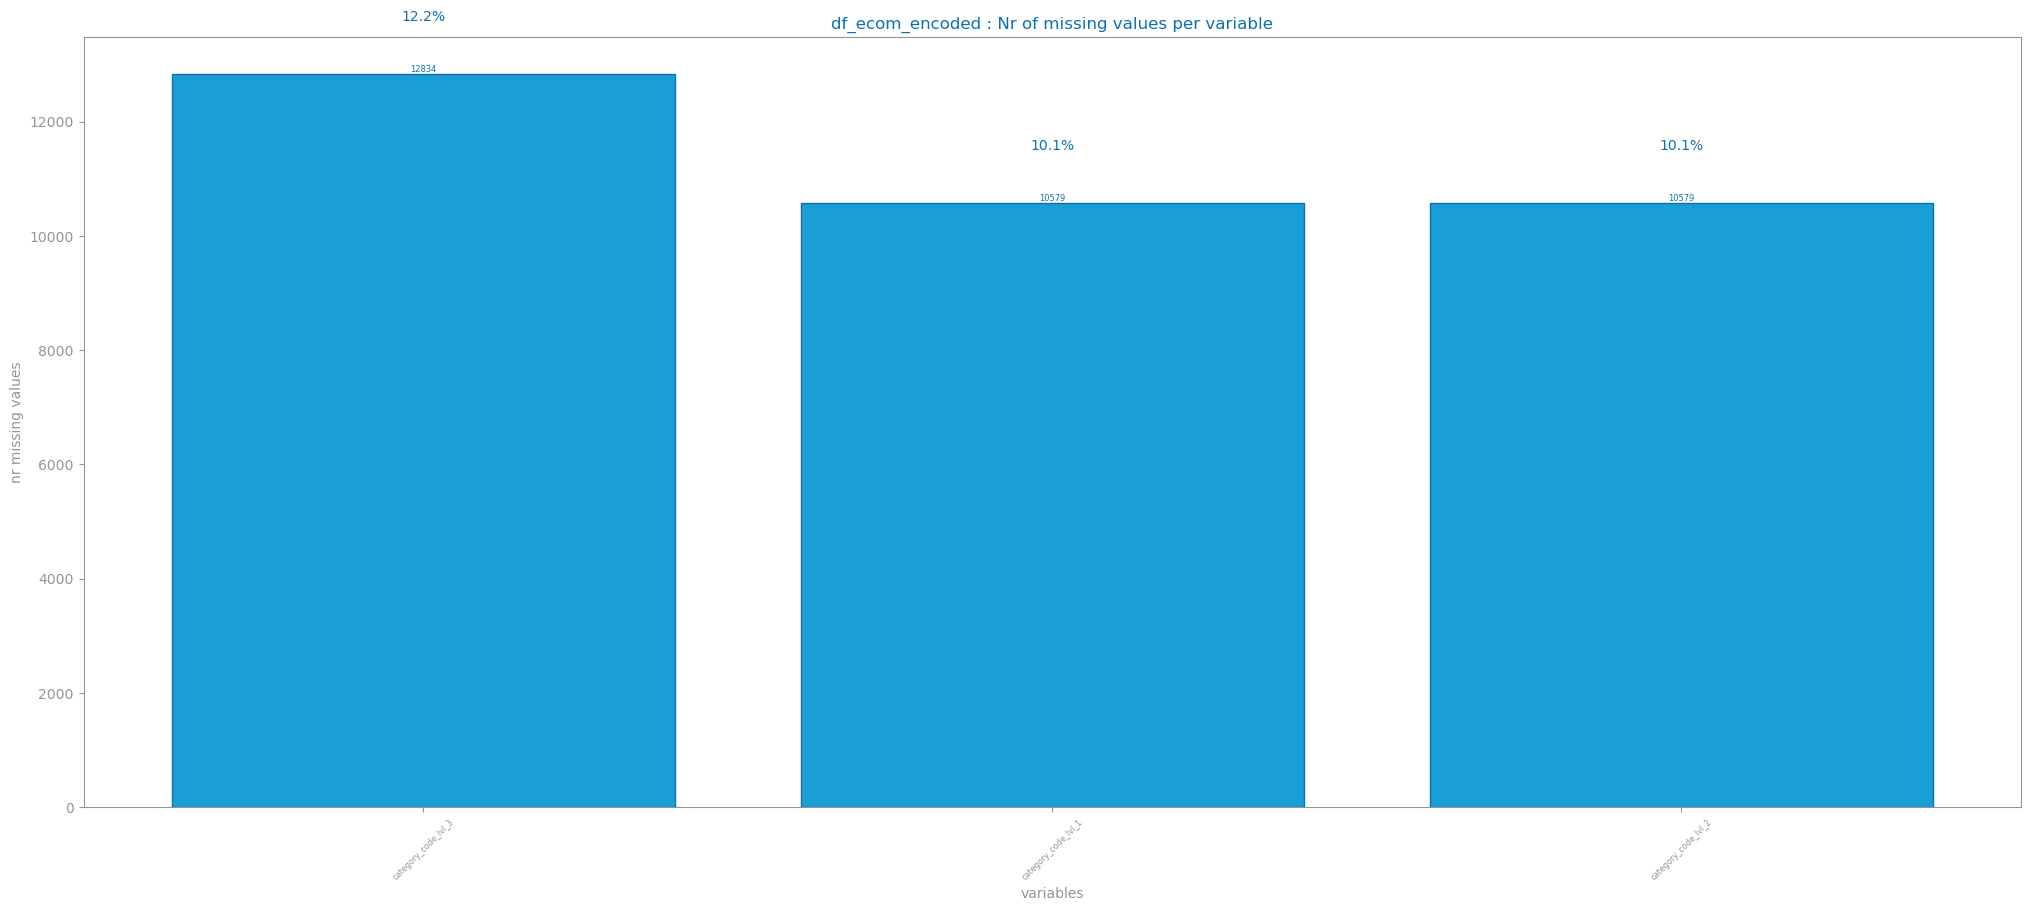

In [12]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(df)

for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} : Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

#savefig(f"./{file_tag}_mv.png")
show()

# MV 1 - Most Frequent Srategy

## MV1 strategy aplication

In [17]:
#from numpy import ndarray
#from pandas import concat
#from sklearn.impute import SimpleImputer, KNNImputer
#from dslabs_functions import mvi_by_filling
#
## this script is available in data_functions originally from DSLabs site in Missing Values chapter
#df_1 =  mvi_by_filling(df, strategy="frequent")
#
#df_1.describe()

,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,week_of_month,day,time_of_day_sin,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos,is_weekend,is_view,is_cart,is_purchase,time_of_day_cos
count,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.0,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000,197632.000000
mean,5.374242,32.385451,76.852409,271.550282,1.900639,16.103612,0.0,0.561417,0.242129,0.003430,-0.262836,-0.003557,0.016947,0.266389,0.912206,0.048110,0.039685,0.198166
std,3.942996,19.705410,40.190717,353.770417,1.213250,8.359449,0.0,0.381172,0.693449,0.750548,0.606384,0.701852,0.712112,0.442071,0.282997,0.213998,0.195218,0.980171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.0,0.000000,-0.866000,-0.998000,-0.991000,-1.000000,-0.999000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,2.000000,15.000000,51.000000,51.460000,1.000000,10.000000,0.0,0.000000,-0.500000,-0.817000,-0.776000,-0.716000,-0.698000,0.000000,1.000000,0.000000,0.000000,-1.000000
50%,5.000000,32.385451,76.852409,148.780000,2.000000,17.000000,0.0,0.500000,0.500000,0.000000,-0.335000,0.000000,0.080000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,11.000000,57.000000,124.000000,339.520000,3.000000,23.000000,0.0,0.866000,1.000000,0.817000,0.203000,0.678000,0.735000,1.000000,1.000000,0.000000,0.000000,1.000000
max,12.000000,61.000000,134.000000,2574.070000,4.000000,29.000000,-0.0,1.000000,1.000000,0.998000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling

# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_1(df):

    df_copy=df.copy()
    df_copy = mvi_by_filling(df_copy, strategy="frequent")

    return df_copy

df_1=apply_strategy_1(df)
df_1.describe()

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,week_of_month,day,time_of_day_sin,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos,conversion,is_weekend,time_of_day_cos
count,104946.000000,104946.000000,104946.000000,104946.000000,104946.000000,104946.000000,104946.000000,104946.0,104946.000000,104946.000000,104946.000000,104946.000000,104946.000000,104946.000000,104946.000000,104946.000000,104946.000000
mean,0.139929,5.686045,33.305880,76.099509,274.273457,1.895375,16.074629,0.0,0.560071,0.242059,0.004498,-0.263821,-0.002982,0.010833,0.046214,0.266575,0.201932
std,0.461280,4.303310,20.759481,39.824664,354.706433,1.208445,8.340027,0.0,0.380747,0.694795,0.749388,0.607388,0.702562,0.711537,0.209950,0.442170,0.979404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.866000,-0.998000,-0.991000,-1.000000,-0.999000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,15.000000,49.000000,51.480000,1.000000,9.000000,0.0,0.000000,-0.500000,-0.817000,-0.776000,-0.716000,-0.698000,0.000000,0.000000,-1.000000
50%,0.000000,5.000000,33.305880,76.099509,149.490000,2.000000,17.000000,-0.0,0.500000,0.500000,0.000000,-0.335000,0.000000,-0.027000,0.000000,0.000000,1.000000
75%,0.000000,12.000000,60.000000,123.000000,346.170000,3.000000,23.000000,0.0,0.866000,1.000000,0.817000,0.203000,0.716000,0.735000,0.000000,1.000000,1.000000
max,2.000000,12.000000,61.000000,131.000000,2574.070000,4.000000,29.000000,0.0,1.000000,1.000000,0.998000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
print("Colunas do DataFrame de df_1:", df_1.columns)

Colunas do DataFrame de df_1: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'is_purchase', 'time_of_day_cos'],
      dtype='object')


## MV1 target class

In [14]:
from numpy import array, ndarray

# labels: list = list(data_1[target].unique())
# labels.sort()
# print(f"Labels={labels}")

# positive: int = 1
# negative: int = 0
# values: dict[str, list[int]] = {
#     "Original": [
#         len(data_1[data_1[target] == negative]),
#         len(data_1[data_1[target] == positive]),
#     ]
# }

# y_1: array = data_1.pop(target).to_list()
# X_1: ndarray = data_1.values

y_1, X_1, labels, values = define_target_and_prepare_data(df_1, target)


Labels=[0.0, 1.0]


In [38]:

print("Colunas do DataFrame de df_1:", df_1.columns)

Colunas do DataFrame de df_1: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos'],
      dtype='object')


## MV1 train/test split 

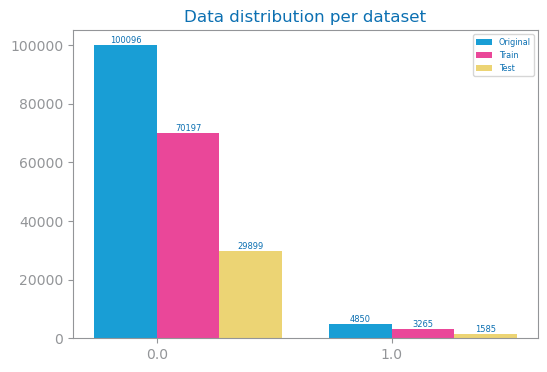

In [15]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart


# Call the function to split the data
train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=df_1.columns), y_1, data_columns=df_1.columns, target_column=target)

# Distribution check
values["Train"] = [
    len(train_1[train_1[target] == 0]),
    len(train_1[train_1[target] == 1]),
]
values["Test"] = [
    len(test_1[test_1[target] == 0]),
    len(test_1[test_1[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

In [16]:
# Verificar o intervalo de dias no conjunto de treino
min_day_train = train_1['day'].min()
max_day_train = train_1['day'].max()

# Verificar o intervalo de dias no conjunto de teste
min_day_test = test_1['day'].min()
max_day_test = test_1['day'].max()

# Exibir os resultados
print(f"Train set - Min day: {min_day_train}, Max day: {max_day_train}")
print(f"Test set - Min day: {min_day_test}, Max day: {max_day_test}")


Train set - Min day: 0.0, Max day: 22.0
Test set - Min day: 22.0, Max day: 29.0


In [25]:
print("Colunas do DataFrame de treino:", train_1.columns)
print("Colunas do DataFrame de teste:", test_1.columns)

Colunas do DataFrame de treino: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')
Colunas do DataFrame de teste: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')


## MV1 evaluate

In [14]:
print("Colunas do DataFrame de treino:", train.columns)
print("Colunas do DataFrame de teste:", test.columns)

Colunas do DataFrame de treino: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')
Colunas do DataFrame de teste: Index(['category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3',
       'price', 'week_of_month', 'day', 'time_of_day_sin', 'day_of_week_sin',
       'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos',
       'is_weekend', 'is_view', 'is_cart', 'time_of_day_cos', 'is_purchase'],
      dtype='object')


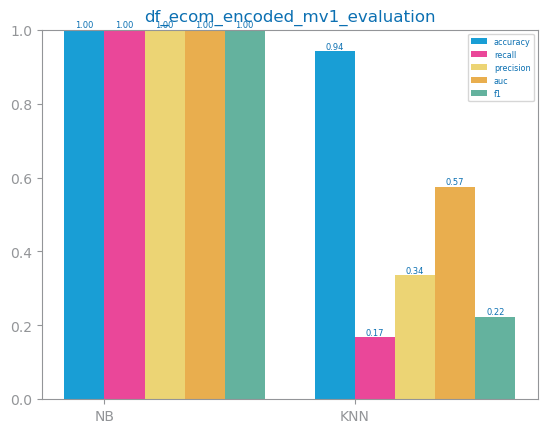

In [18]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

figure()
eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='conversion', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval_1, title=f"{file_tag}_mv1_evaluation", percentage=True
)
#savefig(f"images/{file_tag}_mv1_evaluation.png")
show()

# MV2 - drop null strategy

2. Remove remaining null values records

## MV2 strategy aplication

In [21]:
print("Dimensões antes da remoção:", df_1.shape)
df_1.head()


Dimensões antes da remoção: (104946, 16)


,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,week_of_month,day,time_of_day_sin,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos,is_weekend,time_of_day_cos
0,0.0,0.000000,0.00000,0.000000,283.15,0.0,0.0,0.0,1.0,0.0,-0.398,-0.917,-0.921,0.389,0.0,-1.0
1,0.0,0.000000,6.00000,10.000000,23.68,0.0,0.0,-0.0,1.0,0.0,0.270,0.963,0.941,-0.339,0.0,1.0
2,0.0,2.000000,15.00000,49.000000,514.56,0.0,0.0,0.0,1.0,0.0,-0.136,-0.991,0.461,-0.887,0.0,-1.0
3,0.0,0.000000,0.00000,2.000000,836.31,0.0,0.0,0.0,1.0,0.0,-0.979,0.203,-0.364,-0.931,0.0,-1.0
4,0.0,5.686045,33.30588,76.099509,28.29,0.0,0.0,0.0,1.0,0.0,0.998,-0.068,0.941,-0.339,0.0,1.0


In [19]:
# drop all rows with null values

def apply_strategy_2(df):

    df_copy=df.copy()

    df_copy = df_copy.dropna(axis=0, how="any")

    return df_copy

df_2=apply_strategy_2(df)



In [20]:
print("Dimensões após a remoção:", df_2.shape)
df_2.head()

Dimensões após a remoção: (92112, 17)


,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,conversion,week_of_month,is_weekend,day,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
17596,0,0.0,0.0,0.0,283.15,0,0,0,0,0.0,-1.0,1.0,0.0,-0.398,-0.917,-0.921,0.389
17601,0,0.0,6.0,10.0,23.68,0,0,0,0,-0.0,1.0,1.0,0.0,0.270,0.963,0.941,-0.339
58560,0,2.0,15.0,49.0,514.56,0,0,0,0,0.0,-1.0,1.0,0.0,-0.136,-0.991,0.461,-0.887
86894,0,0.0,0.0,2.0,836.31,0,0,0,0,0.0,-1.0,1.0,0.0,-0.979,0.203,-0.364,-0.931
17583,0,5.0,40.0,76.0,46.08,0,0,0,0,0.0,-1.0,1.0,0.0,-0.398,-0.917,0.106,0.994


## MV2 target class

In [22]:
y_2, X_2, labels, class_counts = define_target_and_prepare_data(df_2, target=target)

Labels=[0, 1]


## MV2 train/test split 

<Axes: title={'center': 'Data distribution per dataset'}>

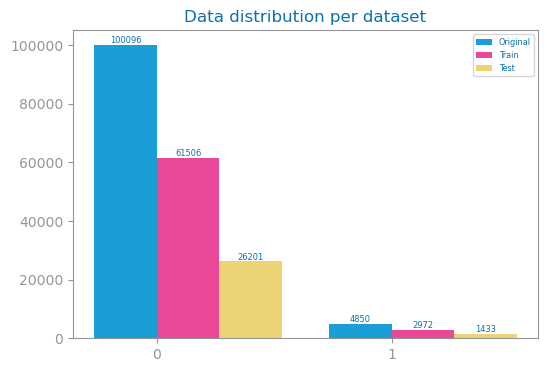

In [23]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data
train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=df_2.columns), y_2, data_columns=df_2.columns, target_column=target)


values["Train"] = [
    len(train_2[train_2[target] == 0]),
    len(train_2[train_2[target] == 1]),
]
values["Test"] = [
    len(test_2[test_2[target] == 0]),
    len(test_2[test_2[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

In [24]:
# Verificar o intervalo de dias no conjunto de treino
min_day_train = train_2['day'].min()
max_day_train = train_2['day'].max()

# Verificar o intervalo de dias no conjunto de teste
min_day_test = test_2['day'].min()
max_day_test = test_2['day'].max()

# Exibir os resultados
print(f"Train set - Min day: {min_day_train}, Max day: {max_day_train}")
print(f"Test set - Min day: {min_day_test}, Max day: {max_day_test}")

Train set - Min day: 0.0, Max day: 22.0
Test set - Min day: 22.0, Max day: 29.0


## MV2 evaluate

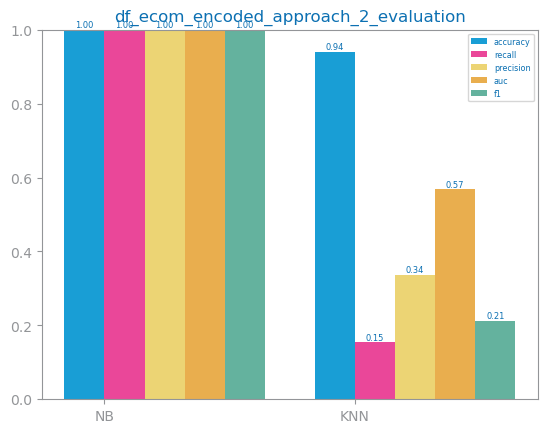

In [26]:

figure()
eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='conversion', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation", percentage=True
)
savefig(f"images/{file_tag}_approach_2_evaluation.png")
show()

## uplift df

In [27]:
algorithms = ['Naive Bayes', 'KNN']

# Create DataFrames for eval_1 and eval_2
df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

# Calculate uplift
df_uplift = df_eval_2 - df_eval_1



# Combine everything into one DataFrame (without misalignment issues)
comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



# Display the DataFrame
comparison_df

Approach 1                                         Approach 2  \
              accuracy    recall precision       auc        f1   accuracy   
Naive Bayes   1.000000  1.000000  1.000000  1.000000  1.000000     1.0000   
KNN           0.941399  0.167192  0.335443  0.574817  0.223158     0.9404   

                                                     Uplift            \
              recall precision      auc        f1  accuracy    recall   
Naive Bayes  1.00000  1.000000  1.00000  1.000000  0.000000  0.000000   
KNN          0.15492  0.337386  0.56914  0.212339 -0.000999 -0.012273   

                                           
            precision       auc        f1  
Naive Bayes  0.000000  0.000000  0.000000  
KNN          0.001943 -0.005677 -0.010819

## t test

In [28]:

from scipy.stats import ttest_rel


# Perform paired t-tests for each metric
t_test_results = {'t_stat': [], 'p_value': []}
for metric in eval_1.keys():
    t_stat, p_value = ttest_rel(df_eval_1[metric], df_eval_2[metric])
    t_test_results['t_stat'].append(t_stat)
    t_test_results['p_value'].append(p_value)

# Create DataFrame for t-test results
df_ttest = pd.DataFrame(t_test_results, index=eval_1.keys())

# Convert t-test results to a DataFrame with MultiIndex and concatenate it
df_ttest_multi = pd.DataFrame({
    ('t_test', 't_stat'): df_ttest['t_stat'],
    ('t_test', 'p_value'): df_ttest['p_value']
})

df_ttest_multi

t_test        
          t_stat p_value
accuracy     1.0     0.5
recall       1.0     0.5
precision   -1.0     0.5
auc          1.0     0.5
f1           1.0     0.5

# Analysis

- we will move forward with approach 1, because it has better recall, precision and accuracy
- Datset choosen:
    - Df_1 : Approach - Replace na by most frequent values

# save to csv

In [29]:
if test_data==False:
    
    df=apply_strategy_2(df)
    
    df.to_csv(f"dataset/df_ecom_2_2_mv_input.csv", index=False)
    